In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
df =  pd.read_csv('data\OBRIO Test task data - tickets.csv')
df

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
0,426981,2024-05-31 23:59,Jim,Team 1,Product 1,84,Unoffered
1,426980,2024-05-31 23:57,Trevor,Team 1,Product 1,90,Offered
2,426979,2024-05-31 23:56,Trevor,Team 1,Other,93,Unoffered
3,426978,2024-05-31 23:55,Jim,Team 1,Other,14,Unoffered
4,426977,2024-05-31 23:55,Fate,Team 1,Other,37,Unoffered
...,...,...,...,...,...,...,...
46866,378447,2024-05-01 0:06,Tracy,Team 3,Product 1,510,Offered
46867,378446,2024-05-01 0:05,Jeff,Team 3,Tech issue,380,Unoffered
46868,378445,2024-05-01 0:04,Dwight,Team 1,Product 1,90,Offered
46869,378444,2024-05-01 0:03,Charles,Team 3,Tech issue,305,Unoffered


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46871 entries, 0 to 46870
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ticket_id           46871 non-null  int64 
 1   request_datetime    46871 non-null  object
 2   agent               46030 non-null  object
 3   agent_team          46871 non-null  object
 4   request_type        46871 non-null  object
 5   reply_time          46871 non-null  object
 6   satisfaction_score  46871 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.5+ MB


In [29]:
df["request_type"].unique()

array(['Product 1 ', 'Other', 'Tech issue', 'Product 2 ', 'Non-customer',
       'Email Marketing', 'Customer Success', 'Personal data deletion',
       'Empty', 'Feedback/suggestion'], dtype=object)

In [51]:
sizes = np.array([df.query('request_type == "{}"'.format(lebel)).shape[0] for lebel in df["request_type"].unique()])
sizes = sizes / sum(sizes)
sizes = sizes[:5]

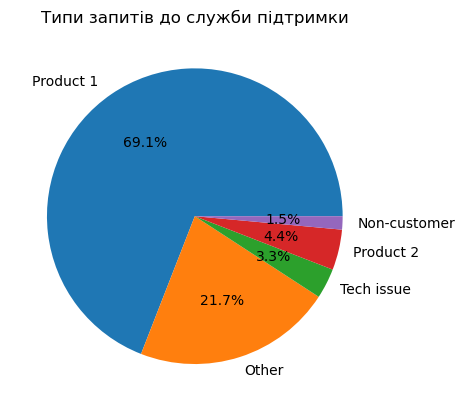

In [56]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=df["request_type"].unique()[:5], autopct='%1.1f%%')
plt.title("Типи запитів до служби підтримки")
plt.show()

In [95]:
time = {}
for t in df["request_datetime"]:
    t1 = pd.to_datetime(t).day
    time[t1] = 1 if t1 not in time else time[t1] + 1

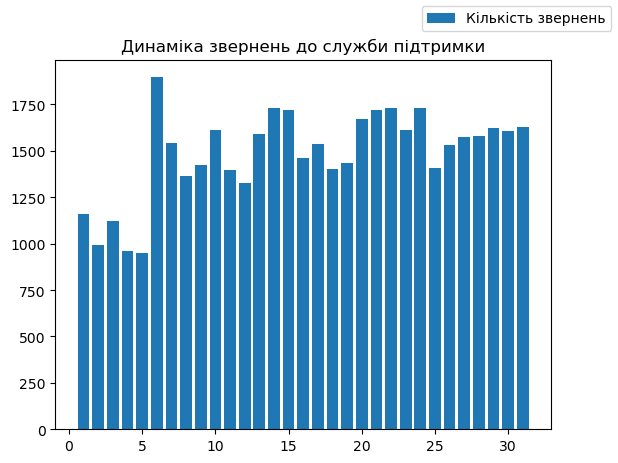

In [98]:
fig, ax = plt.subplots()
ax.bar(time.keys(), time.values())
fig.legend(["Кількість звернень"])
plt.title("Динаміка звернень до служби підтримки")
plt.show()

In [8]:
df["request_datetime"] = pd.to_datetime(df["request_datetime"])
df.head()

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
0,426981,2024-05-31 23:59:00,Jim,Team 1,Product 1,84,Unoffered
1,426980,2024-05-31 23:57:00,Trevor,Team 1,Product 1,90,Offered
2,426979,2024-05-31 23:56:00,Trevor,Team 1,Other,93,Unoffered
3,426978,2024-05-31 23:55:00,Jim,Team 1,Other,14,Unoffered
4,426977,2024-05-31 23:55:00,Fate,Team 1,Other,37,Unoffered


In [10]:
df["agent_team"].unique()

array(['Team 1 ', ' ', 'Team 2 ', 'Team 3 '], dtype=object)

In [12]:
no_reply = df.query("agent_team == ' '")
no_reply

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
7,426974,2024-05-31 23:54:00,NaN,,Empty,,Unoffered
44,426932,2024-05-31 23:27:00,NaN,,Product 1,,Offered
70,426906,2024-05-31 23:11:00,NaN,,Empty,,Unoffered
89,426887,2024-05-31 23:00:00,NaN,,Product 1,,Offered
94,426882,2024-05-31 22:59:00,NaN,,Product 1,,Offered
...,...,...,...,...,...,...,...
46811,378504,2024-05-01 00:46:00,NaN,,Empty,,Offered
46815,378499,2024-05-01 00:43:00,NaN,,Empty,,Unoffered
46817,378496,2024-05-01 00:42:00,NaN,,Product 1,,Offered
46834,378479,2024-05-01 00:32:00,NaN,,Product 2,,Offered


In [14]:
no_reply.size / df.size

0.017942864457767063

In [15]:
df.drop(no_reply.index, inplace=True)

In [23]:
df["agent"].unique()

array(['Jim', 'Trevor', 'Fate', 'Dwight', 'Scott', 'Harry', 'Matheo',
       'Leo', 'Markus', 'Holly', 'Sophia', 'Orianna', 'Vito', 'Dan',
       'Zoe', 'Quentin', 'Irene', 'Dean', 'Max', 'Emma', 'Nathan',
       'Oscar', 'Jeff', 'John', 'Steve', 'Lisa', 'Tracy', 'James', 'Luc',
       'Lily', 'Eva', 'Dylan', 'Bella', 'Tina', 'Charles', 'Nicole',
       'Jessica', 'April', 'Goldie', 'Permanently deleted user'],
      dtype=object)

In [24]:
df.query("agent == 'Permanently deleted user'")

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
46690,378627,2024-05-01 02:22:00,Permanently deleted user,Team 3,Other,398,Unoffered


In [103]:
df["satisfaction_score"].unique()

array(['Unoffered', 'Offered', 'Good with Comment', 'Bad with Comment',
       'Good', 'Bad'], dtype=object)

In [123]:
sizes = np.array([df.query('satisfaction_score== "{}"'.format(lebel)).shape[0] for lebel in df["satisfaction_score"].unique()])
sizes = sizes / sum(sizes)
sizes = sizes * 100

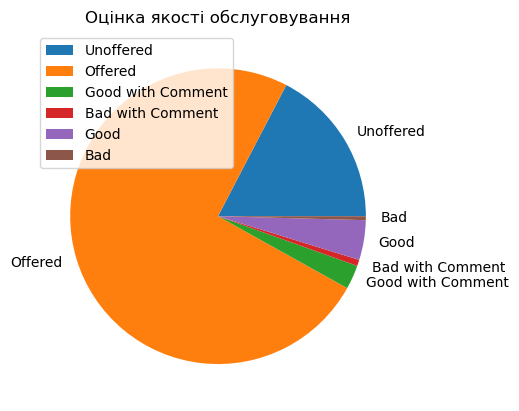

In [128]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=df["satisfaction_score"].unique())
plt.title("Оцінка якості обслуговування")
plt.legend()
plt.show()